<a href="https://colab.research.google.com/github/rsaran-BioAI/AGILE/blob/main/FashionMNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from torchvision import datasets, transforms
import helper
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Lambda

In [ ]:
# Download and load the training data
trainset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data', download=True, train=True, transform=ToTensor())

In [ ]:
# To see what the trainset looks like
# print(trainset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/F_MNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
# Download and load the test data
testset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data/', download=True, train=False, transform=ToTensor())
# 'transform=ToTensor()' converts each image into a tensor
# We could also write this line as: testset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data/', download=True, train=False, transform=ToTensor(), target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))
# Here, the 'target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))' converts the labels into a one-hot encoded tensor.
# But upon doing this, the image will not get visualized so we will do that later.

In [ ]:
# To see what the testset looks like
print(testset)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/F_MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
import matplotlib.pyplot as plt
# 'transform=ToTensor()' converts each image into a tensor
# We could also write this line as: testset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data/', download=True, train=False, transform=ToTensor(), target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))
# Here, the 'target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))' converts the labels into a one-hot encoded tensor.
# But upon doing this, the image will not get visualized so we will do that later.

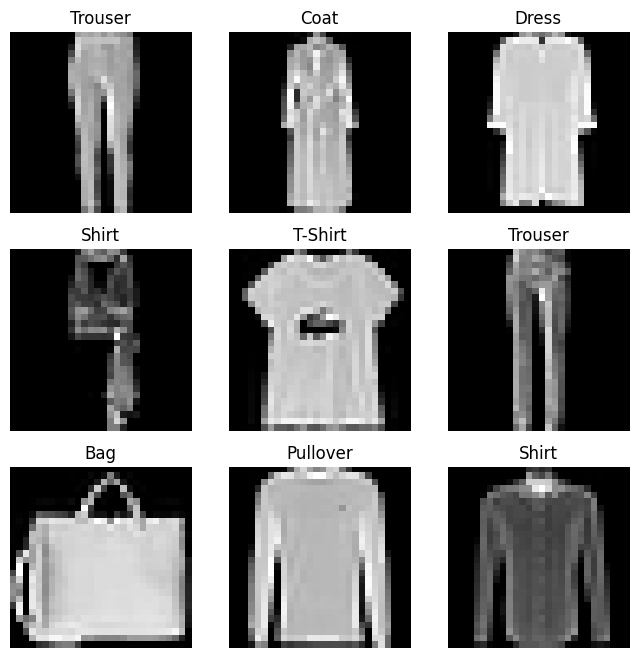

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# Transforming the labels into a one-hot encoded tensor
# trainset.target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
# testset.target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

## Preparing your data for training with DataLoaders

In [ ]:
# The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”...
# ...reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

# DataLoader is an iterable that abstracts this complexity for us in an easy API.

from torch.utils.data import DataLoader

train_dataloader = DataLoader(trainset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testset, batch_size=64, shuffle=True)

# If we did not import Dataloader seperately we can write:
# train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# test_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
# Checking what 'train_dataLoader' looks like
train_dataloader

In [ ]:
# Checking what 'test_dataloader' looks like
test_dataloader

## Iterate through the DataLoader

In [ ]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

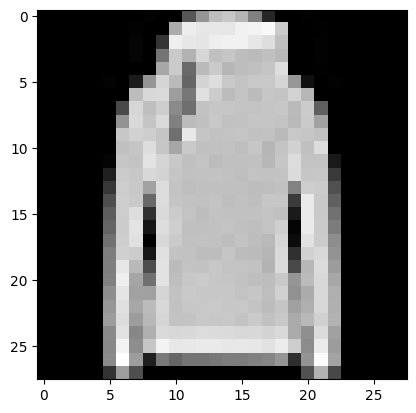

Label: 2


In [ ]:
# We have loaded that dataset into the DataLoader and can iterate through the dataset as needed.
# Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively).
#Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

train_features, train_labels = next(iter(train_dataloader)) # This means that 'DataLoader' function returns two values: train_features and train_labels
print(train_features)
print(train_labels)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

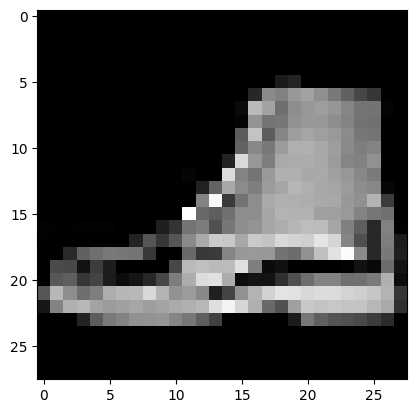

Label: 9


In [ ]:
test_features, test_labels = next(iter(test_dataloader)) # This means that 'DataLoader' function returns two values: 'train_features' and 'train_labels'
print(test_features)
print(test_labels)
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")
img = test_features[0].squeeze()
label = test_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Creating a Custom Dataset for your files

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

In [ ]:
# We did not need to do this as we dont need our data in csv

#class CustomImageDataset(Dataset):
    # The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms
#    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#        self.img_labels = pd.read_csv(annotations_file)
#        self.img_dir = img_dir
#        self.transform = transform
#        self.target_transform = target_transform

    # The __len__ function returns the number of samples in our dataset.
#    def __len__(self):
#        return len(self.img_labels)

    # The __getitem__ function loads and returns a sample from the dataset at the given index idx.
    #Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image...
    # ...retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable)...
    # ...and returns the tensor image and corresponding label in a tuple.
#    def __getitem__(self, idx):
#        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#        image = read_image(img_path)
#        label = self.img_labels.iloc[idx, 1]
#        if self.transform:
#            image = self.transform(image)
#        if self.target_transform:
#            label = self.target_transform(label)
#        return image, label

## Get Device for training

In [ ]:
# We want to be able to train our model on a hardware accelerator like the GPU or MPS, if available.
# Let’s check to see if torch.cuda or torch.backends.mps are available, otherwise we use the CPU.

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


## Building the Neural Network

In [ ]:
# import os # Imported before
# import torch # Imported before
from torch import nn
# from torch.utils.data import DataLoader # Imported before
# from torchvision import datasets, transforms # Imported before

In [ ]:
# We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__.
# Every nn.Module subclass implements the operations on input data in the forward method.

class NeuralNetwork(nn.Module): # Defining a new class NeuralNetwork that inherits from PyTorch's nn.Module. This inheritance is necessary for any custom neural network model in PyTorch.

    def __init__(self): # The initialization method sets up the layers of the neural network.
        super().__init__() # The super().__init__() call is ensuring that the initialization from the parent nn.Module class is also executed.
        self.flatten = nn.Flatten() # This layer will flatten its input. For image data, it converts a 2D image into a 1D tensor.
        self.linear_relu_stack = nn.Sequential( # This defines a sequential stack of layers, including three linear (fully connected) layers separated by ReLU activations.
                                                # The last linear layer has 10 output units, corresponding to 10 classes for classification.
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    # ReLU, which stands for Rectified Linear Unit, is a type of activation function that is widely used in deep neural networks and deep learning models.
    # The function itself is quite simple and is defined as: f(x)=max(0,x)
    # This means that if the input x is positive, it returns x, and if the input x is negative (or zero), it returns 0.
    # Graphically, the function looks like a ramp: it's flat at and below zero, and then increases linearly above zero.

    def forward(self, x): # This method defines the forward pass of the neural network.
                          # When you call the network on some input x, this method will be executed.
                          # It first flattens the input, then passes it through the stack of linear and ReLU layers, and finally returns the output 'nn_output'.
        x = self.flatten(x)
        nn_output = self.linear_relu_stack(x)
        return nn_output

In [ ]:
# We create an instance of NeuralNetwork, and move it to the device, and print its structure.
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Hyperparameters

In [ ]:
# We define the following hyperparameters for training:
# Number of Epochs - the number times to iterate over the dataset
# Batch Size - the number of data samples propagated through the network before the parameters are updated
# Learning Rate - how much to update models parameters at each batch/epoch.
# Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
loss_fn = nn.CrossEntropyLoss()

## Full Implementation

In [ ]:
# We define train_loop that loops over our optimization code

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
# We initialize the loss function and optimizer, and pass it to train_loop and test_loop.
# Feel free to increase the number of epochs to track the model’s improving performance.

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 2.292711  [   64/60000]
loss: 2.277242  [ 6464/60000]
loss: 2.265260  [12864/60000]
loss: 2.250077  [19264/60000]
loss: 2.228553  [25664/60000]
loss: 2.200385  [32064/60000]
loss: 2.191826  [38464/60000]
loss: 2.178619  [44864/60000]
loss: 2.159547  [51264/60000]
loss: 2.158776  [57664/60000]
Epoch 2
-------------------------------
loss: 2.105284  [   64/60000]
loss: 2.060471  [ 6464/60000]
loss: 2.081395  [12864/60000]
loss: 2.031278  [19264/60000]
loss: 1.983804  [25664/60000]
loss: 1.958344  [32064/60000]
loss: 1.954006  [38464/60000]
loss: 1.930899  [44864/60000]
loss: 1.884831  [51264/60000]
loss: 1.793695  [57664/60000]
Epoch 3
-------------------------------
loss: 1.748908  [   64/60000]
loss: 1.798825  [ 6464/60000]
loss: 1.694072  [12864/60000]
loss: 1.732191  [19264/60000]
loss: 1.724791  [25664/60000]
loss: 1.530892  [32064/60000]
loss: 1.543036  [38464/60000]
loss: 1.567201  [44864/60000]
loss: 1.566395  [51264/60000]
loss: 1.41

In [ ]:
# We define test_loop that evaluates the model’s performance against our test data

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [ ]:
test_loop(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 71.1%, Avg loss: 0.780467 



## Saving and Loading Model Weights

In [ ]:
import torchvision.models as models

In [ ]:
# PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted via the torch.save method

model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 83.1MB/s]


In [ ]:
# To load model weights, you need to create an instance of the same model first, and then load the parameters using load_state_dict() method.

model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Saving and Loading Models with Shapes

In [ ]:
# When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network.
# We might want to save the structure of this class together with the model, in which case we can pass model (and not model.state_dict()) to the saving function:

torch.save(model, 'model.pth')

# We can then load the model like this:

model = torch.load('model.pth')